**Lab 6 - Sparse Vector (Embedding)**

Submitted by: Angeline A - 2348409

Submitted on: 08/09/2024

1. a) Consider the table of term frequencies for 3 documents denoted Doc1, Doc2, Doc3 in the given table.
Compute the tf-idf weights for the terms car, auto, insurance, best, for each document, using the idf
values and calculate the score for any user query q. [example query: “car insurance”, “best car” ]

In [1]:
import numpy as np

# Term Frequency (TF) matrix
tf = {
    'car': [27, 4, 24],
    'auto': [3, 33, 0],
    'insurance': [0, 33, 29],
    'best': [14, 0, 17]
}

# Inverse Document Frequency (IDF) values
idf = {
    'car': 1.65,
    'auto': 2.08,
    'insurance': 1.62,
    'best': 1.50
}

# Function to compute TF-IDF
def compute_tfidf(tf, idf):
    tfidf = {}
    for term in tf:
        tfidf[term] = [tf_val * idf[term] for tf_val in tf[term]]
    return tfidf

# Function to compute query score
def compute_query_score(query, tfidf):
    scores = [0] * 3  # One score for each document (Doc1, Doc2, Doc3)
    for term in query:
        if term in tfidf:
            for i in range(3):  # Three documents
                scores[i] += tfidf[term][i]
    return scores

# Step 1: Compute TF-IDF values for each term
tfidf = compute_tfidf(tf, idf)

# Step 2: Compute scores for the queries

# Example queries
queries = {
    "car insurance": ["car", "insurance"],
    "best car": ["best", "car"]
}

for query_name, query_terms in queries.items():
    scores = compute_query_score(query_terms, tfidf)
    print(f"Scores for query '{query_name}': Doc1={scores[0]}, Doc2={scores[1]}, Doc3={scores[2]}")

# Output will be the scores for each document for both queries


Scores for query 'car insurance': Doc1=44.55, Doc2=60.06, Doc3=86.58
Scores for query 'best car': Doc1=65.55, Doc2=6.6, Doc3=65.1


1. b) Apply Euclidean normalization to the tf values from the question 1 a) and generate a table similar to
the one given below.[Optional]

In [2]:
import numpy as np

# Term Frequency (TF) matrix
tf = {
    'car': [27, 4, 24],
    'auto': [3, 33, 0],
    'insurance': [0, 33, 29],
    'best': [14, 0, 17]
}

# Function to compute Euclidean normalization
def euclidean_normalize(tf):
    # Calculate the Euclidean norm for each document
    norms = np.zeros(3)
    for term in tf:
        for i in range(3):  # There are 3 documents
            norms[i] += tf[term][i] ** 2
    norms = np.sqrt(norms)  # Taking the square root of the sums

    # Normalize the TF values
    normalized_tf = {}
    for term in tf:
        normalized_tf[term] = [tf[term][i] / norms[i] if norms[i] != 0 else 0 for i in range(3)]

    return normalized_tf

# Step 1: Normalize the TF values using Euclidean normalization
normalized_tf = euclidean_normalize(tf)

# Step 2: Generate a table similar to the previous one
def print_table(normalized_tf):
    print(f"{'Term':<12} {'Doc1':<12} {'Doc2':<12} {'Doc3':<12}")
    print("-" * 40)
    for term in normalized_tf:
        print(f"{term:<12} {normalized_tf[term][0]:<12.4f} {normalized_tf[term][1]:<12.4f} {normalized_tf[term][2]:<12.4f}")

# Print the normalized table
print("Normalized TF Table (Euclidean Normalization):")
print_table(normalized_tf)


Normalized TF Table (Euclidean Normalization):
Term         Doc1         Doc2         Doc3        
----------------------------------------
car          0.8835       0.0854       0.5811      
auto         0.0982       0.7045       0.0000      
insurance    0.0000       0.7045       0.7021      
best         0.4581       0.0000       0.4116      


2. Cosine Similarity - Compute the nearest neighbours of a word in a vector space using cosine score.
a. Collect N documents as input.
b. Generate a matrix of word embeddings.
c. Plot a few words to understand the similarity based on the word embedding.
d. Compute the nearest word of any given word using cosine scores.
e. Plot all words nearest to a given word x.

In [3]:
pip install youtube-transcript-api transformers nltk spacy


In [4]:
import nltk
from youtube_transcript_api import YouTubeTranscriptApi
from transformers import pipeline
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Step 1: Extract, Clean, and Punctuate Transcript

def get_transcript(video_id):
    """Extracts transcript from a YouTube video given its ID."""
    transcript = YouTubeTranscriptApi.get_transcript(video_id)
    return " ".join([entry['text'] for entry in transcript])

def clean_and_punctuate(transcript):
    """Cleans and punctuates the transcript using a pre-trained model."""
    # Use T5 model for punctuation restoration
    punctuator = pipeline("text2text-generation", model="t5-small")

    # Chunking the text to avoid exceeding token limits
    max_length = 512  # Adjust based on the model's capabilities
    chunks = [transcript[i:i+max_length] for i in range(0, len(transcript), max_length)]

    punctuated_transcript = ""
    for chunk in chunks:
        cleaned_chunk = chunk.lower()  # Lowercasing for consistent punctuation
        punctuated_chunk = punctuator(cleaned_chunk, max_length=512)[0]['generated_text']
        punctuated_transcript += punctuated_chunk + " "

    return punctuated_transcript.strip()


# Extract and clean the transcript
video_id = "W6wVU5b5nQk"
raw_transcript = get_transcript(video_id)
print("Raw Transcript:\n", raw_transcript)

cleaned_punctuated_transcript = clean_and_punctuate(raw_transcript)
print("Cleaned and Punctuated Transcript:\n", cleaned_punctuated_transcript)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Raw Transcript:
 foreign [Music] once upon a time in a small village there lived a wise old Monk he was known far and wide for his wisdom and sense of humor one day a young and eager student named Sam approached the master and said master I want to learn the secret to happiness and success please teach me master Sito looked at Sam with a twinkle in his eye and said very well young one But first you must complete a simple task go to the market and buy the biggest juiciest watermelon you can find then carry it on your head and walk through the village without dropping it Sam was puzzled but determined he went to the market and found a massive watermelon balancing it on his head he walked through the village with utmost concentration as he passed by people couldn't help but laugh and cheer him on some even joined in clapping and making funny faces finally after a bumpy Journey Sam reached Master setu's Hut the watermelon was intact and Sam was relieved he looked at Master situ expecting t

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Cleaned and Punctuated Transcript:
 a young and eager student named sam approached the master and said master i want to learn the secret to happiness and success please teach me master sito looked at sam with a twinkle in his eye and said very well young one but first you must complete a simple task go to the market and buy the biggest juiciest watermelon you can find then carry it on your head an ice cream . master setu's hut the watermelon was intact and sam was relieved he looked at master situ expecting to be praised for his accomplishment . sam was puzzled but determined he went to the market and found a massive watermelon balancing it on his head he walked through the village with utmost concentration . sam was determined he went to the market and found a massive watermelon balancing it on his head he walked through the he sat in laffer well then young won he exclaimed wiping tears of mirth from his eyes he exclaimed wiping tears of mirth from his eyes he exclaimed wiping tears o

In [9]:
!pip install spacy
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:

# Load the spacy model for word embeddings
nlp = spacy.load('en_core_web_md')


In [12]:
# Step 1: Tokenize the cleaned transcript and generate word embeddings
def get_word_embeddings(cleaned_transcript):
    doc = nlp(cleaned_transcript)
    words = [token.text for token in doc if token.is_alpha]  # Only take alphabetic tokens (words)
    embeddings = np.array([token.vector for token in doc if token.is_alpha])  # Get word vectors
    return words, embeddings

# Step 2: Compute cosine similarity between word vectors
def compute_cosine_similarity(embeddings):
    cosine_sim = cosine_similarity(embeddings)
    return cosine_sim

# Step 3: Find the nearest neighbors of a word based on cosine similarity
def get_nearest_neighbors(word, words, embeddings, top_n=5):
    idx = words.index(word)  # Find the index of the word
    cosine_sim = compute_cosine_similarity(embeddings)
    similarities = cosine_sim[idx]

    # Get the indices of the most similar words
    nearest_indices = similarities.argsort()[::-1][1:top_n+1]  # Exclude the word itself
    nearest_words = [(words[i], similarities[i]) for i in nearest_indices]
    return nearest_words

# Step 4: Plot words and their nearest neighbors in 2D space
def plot_words(words, embeddings, target_word):
    # Use PCA to reduce dimensions for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    target_idx = words.index(target_word)
    nearest_neighbors = get_nearest_neighbors(target_word, words, embeddings)
    neighbor_indices = [words.index(word[0]) for word in nearest_neighbors]

    # Plot the target word and its neighbors
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='gray', label="Words")

    # Highlight the target word
    plt.scatter(reduced_embeddings[target_idx, 0], reduced_embeddings[target_idx, 1], color='red', label=target_word)
    plt.text(reduced_embeddings[target_idx, 0], reduced_embeddings[target_idx, 1], target_word, fontsize=12)

    # Highlight nearest neighbors
    for i in neighbor_indices:
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color='blue', label=words[i])
        plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], words[i], fontsize=12)

    plt.title(f"Word Embeddings and Nearest Neighbors of '{target_word}'")
    plt.show()

In [16]:
# Generate word embeddings
words, embeddings = get_word_embeddings(cleaned_punctuated_transcript)

# Test: Find the nearest neighbors of a word
target_word = "looked"  # Example word; change it to any word you like
nearest_neighbors = get_nearest_neighbors(target_word, words, embeddings)
print(f"Nearest Neighbors of '{target_word}':", nearest_neighbors)


Nearest Neighbors of 'looked': [('looked', 0.9999999), ('walked', 0.60982895), ('walked', 0.60982895), ('felt', 0.60928833), ('happened', 0.52688557)]


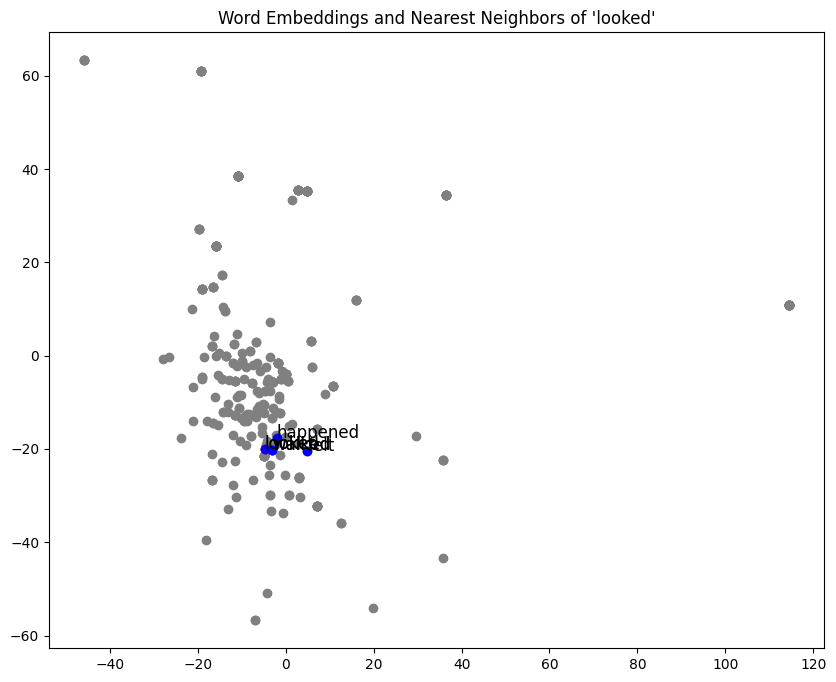

In [17]:

# Plot the word and its neighbors
plot_words(words, embeddings, target_word)

3. Pointwise Mutual Information (PMI): Use PMI when low co-occurances of words exists [Optional]

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
from collections import Counter
import numpy as np
import math
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


def compute_pmi(transcript):
    # Tokenize the transcript
    tokens = word_tokenize(transcript.lower())

    # Compute word frequencies
    word_freq = Counter(tokens)
    total_words = sum(word_freq.values())

    # Compute word co-occurrence frequencies
    bigrams = list(ngrams(tokens, 2))
    bigram_freq = Counter(bigrams)

    # Calculate PMI
    pmi_values = {}
    for (w1, w2), count in bigram_freq.items():
        p_w1 = word_freq[w1] / total_words
        p_w2 = word_freq[w2] / total_words
        p_w1_w2 = count / total_words

        # Avoid division by zero
        if p_w1 > 0 and p_w2 > 0:
            pmi = math.log2(p_w1_w2 / (p_w1 * p_w2))
            pmi_values[(w1, w2)] = pmi

    return pmi_values

# Compute PMI values for the cleaned and punctuated transcript
pmi_values = compute_pmi(cleaned_punctuated_transcript)

# Print some PMI values for example
for pair, pmi in list(pmi_values.items())[:10]:  # Display the first 10 pairs
    print(f"PMI({pair[0]}, {pair[1]}): {pmi:.4f}")


PMI(a, young): 3.9564
PMI(young, and): 3.1788
PMI(and, eager): 4.7638
PMI(eager, student): 8.3487
PMI(student, named): 8.3487
PMI(named, sam): 5.5414
PMI(sam, approached): 4.5414
PMI(approached, the): 3.5414
PMI(the, master): 1.7340
PMI(master, and): 1.9564
